In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/Large language models (2024).csv'
df = pd.read_csv(file_path, encoding='latin1')

df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

df['parameters'] = pd.to_numeric(df['parameters'], errors='coerce')
df['tokens'] = pd.to_numeric(df['tokens'], errors='coerce')
df['alscore'] = (df['parameters'] * df['tokens']) ** 0.5

df.head()


,model,comapany,arch,parameters,tokens,ratio,alscore,training_dataset,release_date,notes,playground
0,Olympus,Amazon,TBA,2000.0,40000.0,20:01,8944.27191,TBA,TBA,New related Titan details: '$65m training run....,https://lifearchitect.ai/olympus/
1,GPT-5,OpenAI,TBA,2000.0,NaN,TBA,NaN,TBA,TBA,Due 2024.,https://lifearchitect.ai/gpt-5/
2,GPT-6,OpenAI,TBA,NaN,NaN,TBA,NaN,TBA,TBA,Due 2025.,https://lifearchitect.ai/gpt-6/
3,AuroraGPT (ScienceGPT),ANL,TBA,1000.0,NaN,TBA,NaN,TBA,TBA,https://tpc.dev/2023/11/10/tpc-announced-with-...,https://www.hpcwire.com/2023/11/13/training-of...
4,Grok-2,xAI,TBA,NaN,NaN,TBA,NaN,TBA,TBA,Due 2025.,https://twitter.com/elonmusk/status/1773655245...



# Feature Engineering

## 1. Calculate missing ALScore where possible


In [3]:

# Calculating ALScore where possible
df['alscore'] = df.apply(
    lambda row: (row['parameters'] * row['tokens']) ** 0.5 if pd.notnull(row['parameters']) and pd.notnull(row['tokens']) else row['alscore'],
    axis=1
)

# Displaying the dataframe with updated ALScore
df[['model', 'parameters', 'tokens', 'alscore']].head(10)


,model,parameters,tokens,alscore
0,Olympus,2000.0,40000.0,8944.271910
1,GPT-5,2000.0,NaN,NaN
2,GPT-6,NaN,NaN,NaN
3,AuroraGPT (ScienceGPT),1000.0,NaN,NaN
4,Grok-2,NaN,NaN,NaN
5,Qwen2,NaN,NaN,NaN
6,Gemma 2,27.0,6000.0,402.492236
7,MAI-1,500.0,10000.0,2236.067977
8,Sparse Llama 7B,7.0,145.0,31.859065
9,Gemini 1.5 Flash,1.8,1.0,1.341641



## 2. Explore the impact of different architectures (if known) on model performance


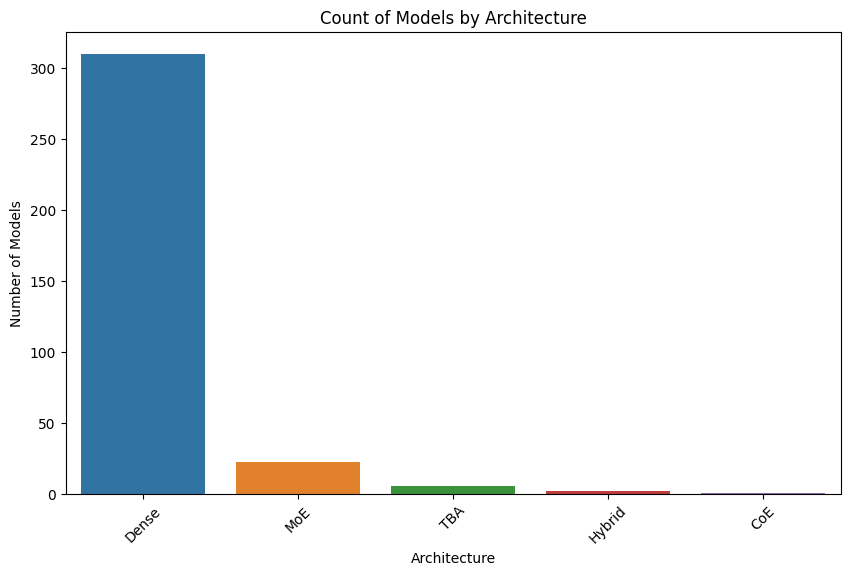

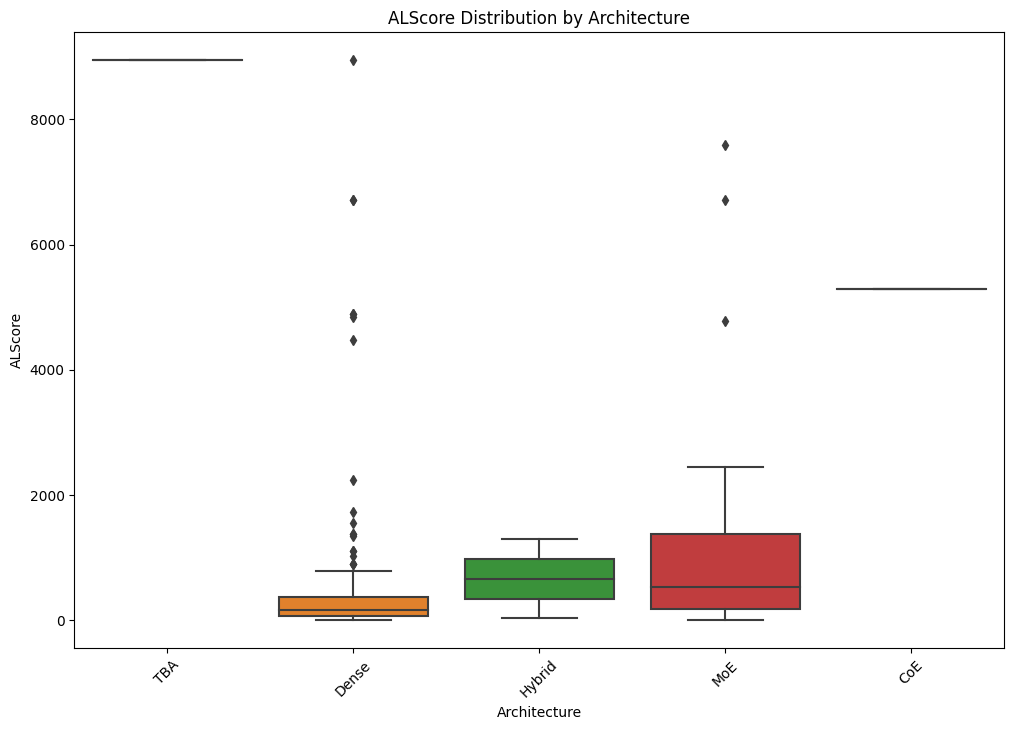

In [4]:

# Count models by architecture
arch_count = df['arch'].value_counts()

# Plotting model count by architecture
plt.figure(figsize=(10, 6))
sns.barplot(x=arch_count.index, y=arch_count.values)
plt.title('Count of Models by Architecture')
plt.xlabel('Architecture')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()

# Boxplot of ALScore by architecture
plt.figure(figsize=(12, 8))
sns.boxplot(x='arch', y='alscore', data=df)
plt.title('ALScore Distribution by Architecture')
plt.xlabel('Architecture')
plt.ylabel('ALScore')
plt.xticks(rotation=45)
plt.show()
